In [7]:
import numpy as np
import time
import statistics
import cvxpy as cp

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from qiskit.providers.aer import QasmSimulator

import networkx as nx
import matplotlib.pyplot as plt
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms.optimizers import COBYLA
from qiskit.algorithms import VQE

# Graph Problems

## Maximum Clique

### 1. Create Random graph with edge probability p=0.5


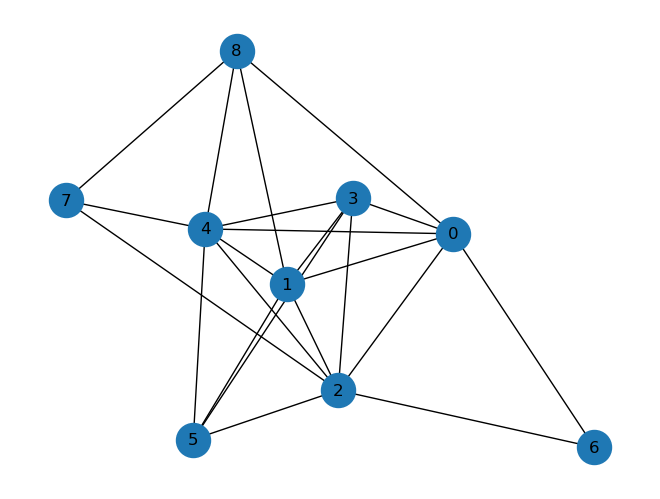

In [13]:
import math
import random
import itertools
from itertools import combinations

def remove_duplicates(a, b):
    return [combo for combo in a if combo not in b]

def generate_planted_clique(n, edge_probability):
    vertex_set=[]
    clique_vertex_set=[]
    # Calculate the size of the planted clique
    clique_size = int(math.sqrt(n))+2
    G = nx.complete_graph(clique_size)
    for i in range(n):
        vertex_set.append(i)
    vertex_set_comb=list(combinations(vertex_set,2))
    for j in range(clique_size):
        clique_vertex_set.append(j)
    clique_vertex_set_comb=list(combinations(clique_vertex_set,2))
    edge_set_to_add=remove_duplicates(vertex_set_comb,clique_vertex_set_comb)
    for k in edge_set_to_add:
        if random.random()>0.5:
            G.add_edge(*k)
    
    
    return G

n=9
planted_clique_graph = generate_planted_clique(n,0.5)
nx.draw(planted_clique_graph,with_labels='True',node_size=600)

In [143]:
A = nx.adjacency_matrix(planted_clique_graph).todense()
nx.write_adjlist(planted_clique_graph, "(64-Vertex-Graph)")

In [144]:
def CP(G):#main funciton
    start=time.process_time()
    global gmax,graph
    graph=G
    gmax=np.array([]) #contains max clique
    C=np.array([])#start with empty clique
    P=np.array(list(graph.nodes))
    P=[node for (node, val) in sorted(graph.degree(P), key=lambda pair: pair[1])]

    def clique(C,P): #sub funtion
        global gmax,graph
        if len(C)>len(gmax):
            gmax=C
            #print(gmax)
        if (len(C)+len(P)>len(gmax)):
             #sorts P by degree every time
                
                for i in range(len(P)):
                    p=P[0]#lowest vertex degree\\
                    P=np.delete(P,np.where(P==p)) #remove the lowest degree vertex
                    C1=np.union1d(C,np.array([p]))#add vertex p to new clique
                    P1=np.intersect1d(np.array(list(graph.adj[p])),P)
                    clique(C1,P1)
        return 
    clique(C,P)
    #return (len(gmax),list(gmax.astype(int)))
    end=time.process_time()
    return (len(gmax),end-start)
#load the graph
G = nx.read_adjlist("(64-Vertex-Graph)")

#run 30 times
solution_times=[]
results=np.array([])
for r in range(30):
    max_clique, solution_time=CP(G)
    solution_times.append(solution_time)
    average=np.mean(solution_times)
    print(max_clique,solution_time,statistics.mean(solution_times))
print("SUCCESS")
    

11 0.28125 0.28125
11 0.4375 0.359375
11 0.28125 0.3333333333333333
11 0.3125 0.328125
11 0.28125 0.31875
11 0.390625 0.3307291666666667
11 0.296875 0.32589285714285715
11 0.234375 0.314453125
11 0.21875 0.3038194444444444
11 0.21875 0.2953125
11 0.203125 0.2869318181818182
11 0.296875 0.2877604166666667
11 0.3125 0.28966346153846156
11 0.296875 0.29017857142857145
11 0.359375 0.2947916666666667
11 0.375 0.2998046875
11 0.28125 0.29871323529411764
11 0.3125 0.2994791666666667
11 0.390625 0.3042763157894737
11 0.296875 0.30390625
11 0.265625 0.3020833333333333
11 0.34375 0.3039772727272727
11 0.375 0.3070652173913043
11 0.359375 0.3092447916666667
11 0.34375 0.310625
11 0.25 0.3082932692307692
11 0.15625 0.30266203703703703
11 0.296875 0.30245535714285715
11 0.359375 0.30441810344827586
11 0.328125 0.30520833333333336
SUCCESS


In [157]:
def NNM(G):
    # Get the adjacency matrix of the graph
    A = nx.adjacency_matrix(G).todense()
    start=time.process_time()#measure after reading
    # Define the optimization problem
    n = A.shape[0]
    X = cp.Variable((n,n), PSD=False)
    obj = cp.Minimize(cp.norm(X, "nuc"))
    constraints = [cp.sum(X) >=1]
    for i in range(n):
        for j in range(n):
            if A[i, j] == 0 and i != j:  # Check if A[i, j] is zero and not on the diagonal
                constraints.append(X[i, j]==0)
    # Solve the optimization problem
    prob = cp.Problem(obj, constraints)
    prob.solve()
    end=time.process_time()
    def binarize_matrix(matrix, threshold):
        # Convert elements to 1 if they are greater than or equal to the threshold, otherwise 0
        binary_matrix = np.where(matrix >= threshold, 1, 0)
        return binary_matrix
    solution_matrix=binarize_matrix(X.value, 0.00001)#0.00001
    return(np.count_nonzero(solution_matrix[0,:]),end-start)
#load the graph
G = nx.read_adjlist("(121-Vertex-Graph)")

#run 30 times
solution_times=[]
results=np.array([])
for r in range(30):
    max_clique, solution_time=NNM(G)
    solution_times.append(solution_time)
    average=np.mean(solution_times)
    print(max_clique,solution_time,statistics.mean(solution_times))
print("SUCCESS")
    


16 25.9375 25.9375
16 26.4375 26.1875
16 26.84375 26.40625
16 26.859375 26.51953125
16 26.265625 26.46875
16 26.4375 26.463541666666668
16 26.546875 26.475446428571427
16 26.25 26.447265625
16 26.390625 26.44097222222222
16 26.328125 26.4296875
16 26.546875 26.44034090909091
16 26.671875 26.459635416666668
16 27.484375 26.53846153846154
16 30.90625 26.850446428571427
16 30.875 27.11875
16 30.46875 27.328125
16 25.078125 27.19577205882353
16 25.953125 27.12673611111111
16 28.03125 27.174342105263158
16 25.59375 27.0953125
16 25.375 27.013392857142858
16 25.328125 26.936789772727273
16 27.921875 26.97961956521739
16 26.71875 26.96875
16 27.390625 26.985625
16 26.421875 26.963942307692307
16 26.875 26.96064814814815
16 28.125 27.002232142857142
16 27.84375 27.03125
16 27.140625 27.034895833333334
SUCCESS


In [98]:
G = nx.read_adjlist("(64-Vertex-Graph)")
G.nodes()

NodeView(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '13', '14', '18', '21', '22', '23', '24', '25', '26', '29', '30', '33', '38', '39', '42', '45', '46', '47', '49', '50', '52', '58', '59', '60', '62', '63', '11', '12', '15', '16', '17', '19', '35', '37', '43', '44', '56', '57', '32', '36', '40', '51', '61', '28', '34', '41', '53', '31', '54', '27', '55', '20', '48'))

In [113]:
def greedy_sequential(graph, vertices=None, passes=1, classes=True):
    r"""Returns an approximation (upper bound) to the chromatic number of
    the graph, along with an approximate coloring.

    Parameters
    ----------
    graph : rosemary.graphs.graphs.Graph

    passes : int, optional (default=1)
        Optional number of passes to make. A standard is to make two
        passes; once forwards and once backwards.

    classes : bool, optional (default=True)
        If True, returns a partition of the vertices of graph into color
        classes. Otherwise, returns a color map of the vertices.

    vertices : list, optional (default=None)
        An optional list of the vertices in the order to be colored.

    Returns
    -------
    (k, color_classes) : tuple
        The integer `k` is an upper bound to the chromatic number of the
        graph. The list `color_classes` is a partition of the vertices into
        color classes.

    Notes
    -----
    This is the classical greedy sequential algorithm. The first vertex is
    put into the first color class. Thereafter, each vertex is colored with
    the minimum color such that no conflicts are created. See [2] for more
    details.

    A useful fact is that if we take any permutation of the vertices in
    which the vertices of each color class are adjacent in the permutation,
    then applying the greedy sequential algorithm will produce a coloring
    at least as good as the original. Because of this, it is often useful
    to iteratively apply the greedy sequential algorithm to refine a given
    coloring. See [1] for more details about this.

    References
    ----------
    .. [1] J.C. Culberson, "Iterated Greedy Graph Coloring and the
    Difficulty Landscape", Technical Report, University of Alberta, 1992.

    .. [2] D.S. Johnson, C.R. Aragon, L.A. McGeoch, C. Schevon,
    "Optimization by Simulated Annealing: An Experimental Evaluation; Part
    II, Graph Coloring and Number Partitioning", Operations Research,
    Volume 39, Issue 3, May-June 1991, 378-406.

    Examples
    --------
    >>> graph = petersen_graph()
    >>> greedy_sequential(graph)
    (3, [[0, 2, 8, 9], [4, 6, 7], [1, 3, 5]])
    >>> greedy_sequential(graph, classes=False)
    (3, {0: 0, 1: 2, 2: 0, 3: 2, 4: 1, 5: 2, 6: 1, 7: 1, 8: 0, 9: 0})
    >>> greedy_sequential(graph, passes=2)
    (3, [[1, 3, 5, 9], [4, 6, 7], [0, 2, 8]])
    """
    if vertices is None:
        P=np.array(list(graph.nodes))
        vertices=[node for (node, val) in sorted(graph.degree(P), key=lambda pair: pair[1])]
        vertices=vertices[::-1]

    color_map = {}
    v = vertices[0]
    color_map[v] = 0
    print(color_map)
    num_colors = 1

    for i in range(1, len(vertices)):
        v = vertices[i]
        adjacent_colors = set([])
        for u in graph[v]:
            if u in color_map:
                adjacent_colors.add(color_map[u])

        for color in range(num_colors + 1):
            if color not in adjacent_colors:
                color_map[v] = color
                if color == num_colors:
                    num_colors += 1
                break

    if classes or passes > 1:
        color_classes = [[] for i in range(num_colors)]
        for i in color_map:
            print(color_map)
            print(i+1)
            u,color=color_map(i)
            color_classes[color].append(u)

        if classes and passes == 1:
            return (num_colors, color_classes)

        elif passes > 1:
            reversed_vertices = []
            while color_classes:
                reversed_vertices.extend(color_classes.pop())

            return greedy_sequential(graph, vertices=reversed_vertices,
                                     passes=1, classes=classes)

    return (num_colors, color_map)


def ostergard_binary(graph):
    """
    Returns a maximum clique of graph.
    Input:
        * graph: Graph
    Ouput:
        * (size, clique): tuple
            * size: int
                Size of the maximum clique.
            * clique: list
                Vertices of a maximum clique of graph.
    Examples:
        >>> G = coprime_pairs_graph(10)
        >>> ostergard(G)
        (5, [1, 5, 7, 9, 8])
        >>> G = random_graph(30, 0.5)
        >>> ostergard(G)
        (6, [0, 11, 20, 23, 26, 28])
    Details:
        This function follows the algorithm outlined in the paper "A Fast
        Algorithm for the Maximum Clique Problem" by Ostergard. Experimental
        evidence suggests that this algorithm is superior to the Pardalos
        algorithm for graphs with low edge density.
    """
    # We order the vertices by color class. In each class, the vertices are
    # ordered by their degree in the graph.
    start=time.process_time()
    vertices = []
    (num_colors, coloring) = greedy_sequential(graph)
    for color_class in coloring:
        vertices.extend(sorted(color_class, key=graph.degree, reverse=True))

    vertices = vertices[::-1]
    num_vertices = len(vertices)
    all_vertices = 2**num_vertices - 1

    # Dicts for translating between bit form and vertex form.
    int_to_vertex_map = {}
    vertex_to_int_map = {}

    i = 1
    for u in vertices:
        vertex_to_int_map[u] = i
        int_to_vertex_map[i] = u
        i <<= 1

    neighbors = {}
    for u in vertices:
        i = vertex_to_int_map[u]
        neighbors[i] = 0
        for v in graph.neighbors(u):
            neighbors[i] |= vertex_to_int_map[v]

    max_clique = [0, 0]

    def backtrack(used, candidates, size):
        if not candidates:
            if size > max_clique[0]:
                max_clique[0] = size
                max_clique[1] = used
                found[0] = True
            return

        num_candidates = bin(candidates).count('1')
        while candidates and size + num_candidates > max_clique[0]:
            u = candidates & (-candidates)

            if size + largest[u] <= max_clique[0]:
                return

            candidates &= (candidates - 1)
            num_candidates -= 1
            backtrack(used | u, candidates & neighbors[u], size + 1)

            if found[0]:
                return

    # largest[i] is the size of the maximum clique in S[i].
    largest = defaultdict(int)

    # S[i] is the set of vertices {v_i, v_{i + 1}, ..., v_{n - 1}}.
    S = [0]*num_vertices
    for i in range(num_vertices):
        S[i] = (all_vertices >> i) << i

    for i in range(num_vertices - 1, -1, -1):
        found = [False]
        u = 1 << i
        backtrack(u, S[i] & neighbors[u], 1)
        largest[u] = max_clique[0]

    bits = max_clique[1]
    clique = []
    for i in range(num_vertices):
        if bits & (1 << i):
            clique.append(vertices[i])
    end=time.process_time()

    return(max_clique[0],end-start)
    #return max_clique[0], clique
#load the graph
G = nx.read_adjlist("(9-Vertex-Graph)")

#run 30 times
solution_times=[]
results=np.array([])
for r in range(30):
    max_clique, solution_time=ostergard_binary(G)
    solution_times.append(solution_time)
    average=np.mean(solution_times)
    print(max_clique,solution_time,statistics.mean(solution_times))
print("SUCCESS")
    


{'3': 0}
{'3': 0, '2': 1, '1': 2, '6': 3, '4': 3, '0': 4, '5': 1, '8': 0, '7': 2}


TypeError: can only concatenate str (not "int") to str

### 2. Instantiate the Clique class using the graph above (this creates a Clique object)

In [88]:
from qiskit_optimization.applications import Clique
#load the graph//
G = nx.read_adjlist("(9-Vertex-Graph)")
clique_object=Clique(G)


### 3. Use the quadratic program method of the Clique class to convert problem instance into a quadratic program

In [89]:
quad_prog=clique_object.to_quadratic_program()
print(quad_prog.prettyprint())

Problem name: Clique

Maximize
  x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8

Subject to
  Linear constraints (14)
    x_0 + x_5 <= 1  'c0'
    x_0 + x_6 <= 1  'c1'
    x_0 + x_8 <= 1  'c2'
    x_1 + x_7 <= 1  'c3'
    x_1 + x_8 <= 1  'c4'
    x_2 + x_7 <= 1  'c5'
    x_2 + x_5 <= 1  'c6'
    x_3 + x_8 <= 1  'c7'
    x_4 + x_7 <= 1  'c8'
    x_4 + x_5 <= 1  'c9'
    x_4 + x_6 <= 1  'c10'
    x_6 + x_7 <= 1  'c11'
    x_7 + x_8 <= 1  'c12'
    x_5 + x_8 <= 1  'c13'

  Binary variables (9)
    x_0 x_1 x_2 x_3 x_4 x_5 x_6 x_7 x_8



### 4. Convert the quadratic program into a QUBO formulation 

In [90]:
from qiskit_optimization.converters import QuadraticProgramToQubo #use QISKIT in-built translators
conv = QuadraticProgramToQubo() #instantiate class
qubo = conv.convert(quad_prog) #use method of the class to convert quadratic program
print(qubo.prettyprint())
#Notice this is now a minimisation problem. Why?
#All constraints have moved to the objective function

Problem name: Clique

Minimize
  10*x_0*x_5 + 10*x_0*x_6 + 10*x_0*x_8 + 10*x_1*x_7 + 10*x_1*x_8 + 10*x_2*x_5
  + 10*x_2*x_7 + 10*x_3*x_8 + 10*x_4*x_5 + 10*x_4*x_6 + 10*x_4*x_7 + 10*x_5*x_8
  + 10*x_6*x_7 + 10*x_7*x_8 - x_0 - x_1 - x_2 - x_3 - x_4 - x_5 - x_6 - x_7
  - x_8

Subject to
  No constraints

  Binary variables (9)
    x_0 x_1 x_2 x_3 x_4 x_5 x_6 x_7 x_8



### 5. Obtain the Ising Hamiltonian operator of the graph 

In [92]:
ising_op, offset = qubo.to_ising()
print(ising_op)

SparsePauliOp(['IIIIIIIIZ', 'IIIIIIIZI', 'IIIIIIZII', 'IIIIIZIII', 'IIIIZIIII', 'IIIZIIIII', 'IIZIIIIII', 'IZIIIIIII', 'ZIIIIIIII', 'IIIZIIIIZ', 'IIZIIIIIZ', 'ZIIIIIIIZ', 'IZIIIIIZI', 'ZIIIIIIZI', 'IIIZIIZII', 'IZIIIIZII', 'ZIIIIZIII', 'IIIZZIIII', 'IIZIZIIII', 'IZIIZIIII', 'ZIIZIIIII', 'IZZIIIIII', 'ZZIIIIIII'],
              coeffs=[ -7. +0.j,  -4.5+0.j,  -4.5+0.j,  -2. +0.j,  -7. +0.j,  -9.5+0.j,
  -7. +0.j, -12. +0.j, -12. +0.j,   2.5+0.j,   2.5+0.j,   2.5+0.j,
   2.5+0.j,   2.5+0.j,   2.5+0.j,   2.5+0.j,   2.5+0.j,   2.5+0.j,
   2.5+0.j,   2.5+0.j,   2.5+0.j,   2.5+0.j,   2.5+0.j])


### 6. Solve Classically (Numpy Minimum Eigensolver) (Deterministic approach)

In [10]:
#check if Hamiltonian gives the right cost
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

from qiskit_optimization.algorithms import MinimumEigenOptimizer #this is a wrapper for minimum eigen solvers

exact = NumPyMinimumEigensolver()
meo = MinimumEigenOptimizer(min_eigen_solver=exact)
exact_result = meo.solve(quad_prog) #we can solve the original Quadratic formulation
#exact_result = meo.solve(qubo) #or we can solve 
print(exact_result.prettyprint())

objective function value: 5.0
variable values: x_0=1.0, x_1=1.0, x_2=1.0, x_3=1.0, x_4=1.0, x_5=0.0, x_6=0.0, x_7=0.0, x_8=0.0
status: SUCCESS


### 7. Solve using Quantum Algortihms 

#### Load Account, initialise service instance and specify backend

In [81]:
#Load Account

from qiskit_ibm_runtime import QiskitRuntimeService, Options

# Save an IBM Quantum account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="36fde679ec9ccc024436528faf6a35cb621f1b203e40692abcfc64b42522747d1771e9dadf95f315de9f4c310fc786405e9be8ef9a7e6c77956d22ea8bd8be8b",overwrite="True")

#Initialise service instance
service = QiskitRuntimeService(channel="ibm_quantum")

options = Options(optimization_level=1)
service.backends()



In [83]:
backend=service.get_backend('ibm_sherbrooke')

#### 7.1. (SamplingVQE) (Hueristic approach)

In [86]:
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE,VQE
from qiskit.algorithms.optimizers import COBYLA
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from scipy.optimize import minimize
from qiskit.primitives import Sampler, Estimator
from qiskit_ibm_runtime import Session
var_form= TwoLocal(ising_op.num_qubits, 'ry', 'cz', reps=1, entanglement='linear')
vqe=SamplingVQE(Sampler,ansatz=var_form, optimizer=COBYLA(50))
vqe_result = meo.solve(quad_prog) #minimum_eigen_optimizer automatically converts quadratic/QUBO to ISING
print(vqe_result.prettyprint())


AttributeError: 'list' object has no attribute '_validate_circuits'

In [85]:
meo = MinimumEigenOptimizer(min_eigen_solver=vqe) #setter
vqe_result = meo.solve(quad_prog) #minimum_eigen_optimizer automatically converts quadratic/QUBO to ISING
print(vqe_result.prettyprint())
print("\ntime:", vqe_result.min_eigen_solver_result.optimizer_time)
#result= vqe.compute_minimum_eigenvalue(operator=opsparse) This is done inside meo.solve
#x=G1.sample_most_likely(result.eigenstate)


AttributeError: 'list' object has no attribute '_validate_circuits'

#### 7.2. (EstimiatorVQE) (Hueristic approach)

In [49]:
from qiskit.providers.fake_provider import FakeHanoi
from qiskit.primitives import BackendSampler
from qiskit.primitives import Estimator

#backend = FakeHanoi()
#sampler = Sampler()
estimator=Estimator()

counts = []
values = []

def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

var_form= TwoLocal(ising_op.num_qubits, 'ry', 'cz', reps=5, entanglement='linear')
vqe=VQE(estimator,ansatz=var_form, optimizer=COBYLA(50),callback=store_intermediate_result)
meo = MinimumEigenOptimizer(min_eigen_solver=vqe)
vqe_result=vqe.compute_minimum_eigenvalue(operator=ising_op)
#vqe_result = meo.solve(quad_prog) #minimum_eigen_optimizer automatically converts quadratic/QUBO to ISING
print(vqe_result)
#print("\ntime:", vqe_result.min_eigen_solver_result.optimizer_time)
#result= vqe.compute_minimum_eigenvalue(operator=opsparse)
#SampleVQE_result=G1.sample_most_likely(result.eigenstate)
#print(result.eigenstate)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 50,
    'eigenvalue': -4.380384083332846,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x0000025A7D458C90>,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): 0.429618979146137,
                              ParameterVectorElement(θ[1]): -1.2207863729581796,
                              ParameterVectorElement(θ[2]): -4.42933485799078,
                              ParameterVectorElement(θ[3]): -4.036002168411756,
                              ParameterVectorElement(θ[4]): -3.38411718727698,
                              ParameterVectorElement(θ[5]): -1.632709850417776,
                              ParameterVectorElement(θ[6]): -1.484220669665239,
                              ParameterVectorElement(θ[7]): 1.707886937326271,
                              ParameterVectorElement(θ[8]): 3.0103473501679203,
                              ParameterVectorElement(θ[9]): -3.264643836

### Plot Estimator VQE

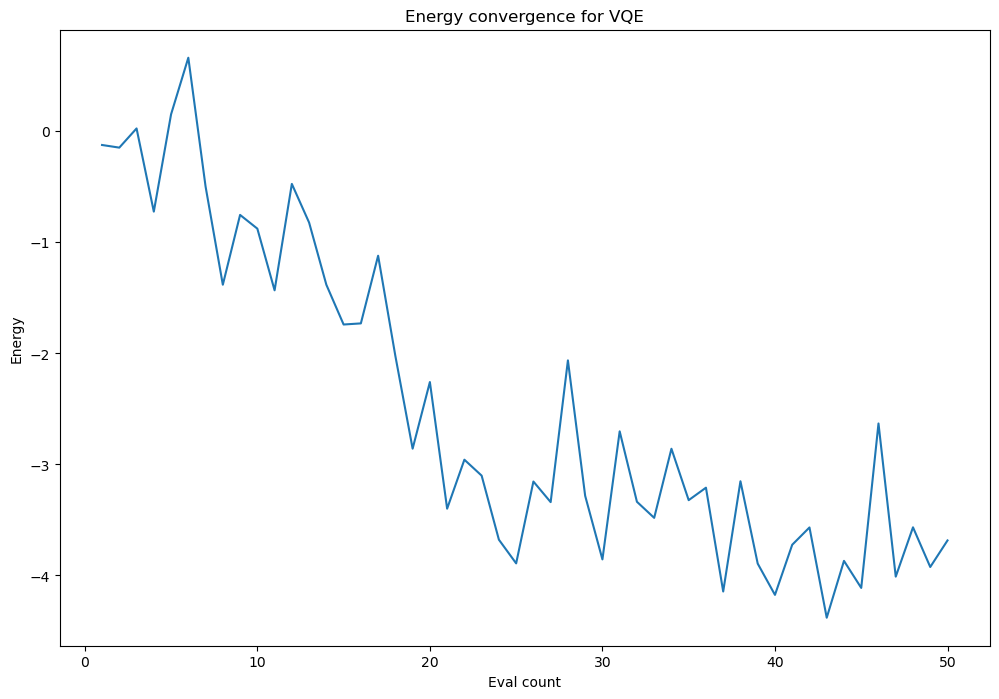

In [53]:
import pylab

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for VQE")       
pylab.rcParams["figure.figsize"] = (12, 8)
pylab.plot(counts, values)

#### 7.3. (SamplingQAOA) (Hueristic approach)

In [87]:
from qiskit.algorithms.minimum_eigensolvers import QAOA
from qiskit.algorithms.optimizers import COBYLA
from qiskit_optimization.algorithms import MinimumEigenOptimizer

from qiskit.providers.fake_provider import FakeHanoi
from qiskit.primitives import BackendSampler

#backend = FakeHanoi()


qaoa=QAOA(reps=1, sampler=Sampler(), optimizer=COBYLA(50))
meo = MinimumEigenOptimizer(min_eigen_solver=qaoa)
qaoa_result = meo.solve(quad_prog) #minimum_eigen_optimizer automatically converts quadratic/QUBO to ISING
print(qaoa_result.prettyprint())
print("\ntime:", qaoa_result.min_eigen_solver_result.optimizer_time)
#result= vqe.compute_minimum_eigenvalue(operator=opsparse)
#SampleVQE_result=G1.sample_most_likely(result.eigenstate)
#print(result.eigenstate)

objective function value: 3.0
variable values: x_0=1.0, x_1=1.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=0.0, x_6=0.0, x_7=0.0, x_8=0.0
status: SUCCESS

time: 6.658966541290283


#### 7.4. (EstimatorQAOA) (Hueristic approach)

#### 7.5. (GroversOptimizer) (Hueristic approach)

In [21]:
#Using grovers optimisation in the Qiskit library 
#Specifically known as Grovers Adaptive Search (GAS) 
#Iteratively applies grovers to find optimum value by using the optimum value of the previous iteration
#The adaptive oracle used in GAS recognizes all values above or below the current threshold (for max and min respectively)
#decreasing the size of the search space every iteration the threshold is updated, until an optimum is found.
from qiskit_optimization.algorithms import GroverOptimizer
grover_optimizer = GroverOptimizer(6, num_iterations=10, sampler=Sampler())
results = grover_optimizer.solve(qubo)
print(results.prettyprint())


KeyboardInterrupt: 